# Using Reddit's API for Predicting Comments

# Executive Summary

   Reddit has become one of the centers of the internet.  Over 150 million people used reddit just in the last month.  This is a huge community of people looking to engage in whatever topics one can think of.   Having a trending or ‘Hot’ post on reddit can really up the views on a post.  Everyone wants to see what everyone else is seeing, no one wants to miss out on anything in this digital age.
   
   Knowing what features, whether they be numerical or categorical, that can lead to having a hot post on reddit can be a huge advantage for people and businesses looking to gain exposure.  Using the reddit api, nlp and classification models one can gain the edge they need for their post to be ‘Hot’.
   
   First off, the numerical data.  The amount of time the post has been up on reddit and the number of cross-posts.  A ‘Hot’ post has an average time of being up on reddit for 9.96 hours.  If you are thinking about whether to cross-post or not, it is better to cross-post than to not cross-post. Using nlp techniques I look at words as data. When looking at the subreddits, the top 3 subreddits for a ‘Hot’ post are gaming, funny, and askreddit.  When looking at words in a post title that are in ‘Hot’ posts, the top three are, ‘need’, ‘nice’ and ‘true’. Overall the numerical data lead to better results than the nlp data.
   
   These results only enhance what we can learn about what factors lead to a ‘Hot’ post on reddit.  Finding out what makes a post, ‘Hot’ can be vital information to anyone trying to make it in social media or a business trying to be the first to capitalize on a new trend. 



# Scraping Reddit
Utilizing the reddit api our goal is to predict wheather a comment is hot or not. A 'Hot' post is one that exceeds the median number of comments from the pulled reddit posts. If a post is below the median number of coments it is categorized as a 'Not'. The code below will exhibit how the posts were pulled from the reddit api and the different models utilzed to examine the posts. 

In [1]:
import requests
import pandas as pd
import json

import numpy as np

In [2]:
URL = "http://www.reddit.com/hot.json"

In [3]:

res = requests.get(URL, headers={'User-agent': 'Scott Sanowitz Bot 0.1'})

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

In [4]:
data = res.json()

print(len(data['data']['children']))

25


#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/hot.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit the number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [5]:
import time
after = data['data']['after']
print(after)
URL = 'http://www.reddit.com/hot.json?count={}&'.format(25) + after
res = requests.get(URL, headers={'User-agent': 'Scott Sanowitz Bot 0.1'})
data = res.json()


t3_90p2ob


In [6]:
type(URL)


str

In [7]:
data['data']['after']

't3_90p2ob'

# Pulling posts
The code below was used to pull posts from the reddit api. Each time one pulls from the reddit api one gets 25 posts. This code allows someone to pull multiple times from the reddit api. If in this particular example I pulled 150 times giving me 3750 posts from reddit.

In [8]:

posts = []
after = None
headers = {'User-agent': 'Scott Sanowitz bot 0.1'}
for i in range(150):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after': after}
    url = 'https://www.reddit.com/hot.json'
    res = requests.get(url, params=params, headers=headers)
    if res.status_code == 200:
        the_json = res.json()
        posts.extend(the_json['data']['children'])
        after = the_json['data']['after']
    else:
        print(res.status_code)
        break
    time.sleep(3)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [9]:
len(posts)

3750

This code lets me know if any posts pulled were duplicates. There is evidence that some of my posts are duplicates due to a difference in number from 3750 to 3615.

In [10]:
len(set([p['data']['name'] for p in posts]))

3615

In [11]:
posts[0]['data']['title'] # title
posts[0]['data']['subreddit'] #subreddit
time.time() - posts[0]['data']['created_utc'] #time UTC on reddit when pulled
posts[0]['data']['num_comments'] # # of comments
posts[0]['data']['is_video'] # is it a video
posts[0]['data']['num_crossposts'] # # of crossposts: same post in different subreddits

1

# List of dictionaries
This code makes a list of dictionaries of the chosen features from the reddit posts. Seen below are the title of the reddit post, the subbreddit the reddit post belonged to, the time the reddit post has been up on reddit, the number of comments the reddit post has, the number of crossposts the reddit post has and if the rediit post is a video or not. These features have been made into a list of dictionaries so that they can be easily made into a pandas dataframe and saved to as a csv file.

In [12]:
# make a list of dictionaries
infos = []
for p in posts:
    info = {}
    info['title'] = p['data']['title']
    info['subreddit'] = p['data']['subreddit']
    info['time_elasped'] = time.time() - p['data']['created_utc']
    info['num_comments'] = p['data']['num_comments']
    info['num_crossposts'] = p['data']['num_crossposts']
    info['is_video'] = p['data']['is_video']
    infos.append(info)
    
    

In [13]:
df = pd.DataFrame(infos)
df.head()

,is_video,num_comments,num_crossposts,subreddit,time_elasped,title
0,False,1252,1,movies,11231.469419,Fantastic Beasts: The Crimes of Grindelwald - ...
1,False,1021,4,gaming,19920.469423,Rockstar gave away a 'key to the city' to peop...
2,True,440,7,funny,17785.469426,Dinner time in Mexico can escalate quickly
3,True,262,0,Zoomies,19184.469428,RIP to this great pup and excellent zoomer :(
4,False,317,0,MovieDetails,18608.469430,When Butch escapes the pawn shop in Pulp Ficti...


In [16]:
df.num_comments.median()

15.0

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [17]:
# Export to csv
df.to_csv('./df.csv', index=False)
df.head()

,is_video,num_comments,num_crossposts,subreddit,time_elasped,title
0,False,1252,1,movies,11231.469419,Fantastic Beasts: The Crimes of Grindelwald - ...
1,False,1021,4,gaming,19920.469423,Rockstar gave away a 'key to the city' to peop...
2,True,440,7,funny,17785.469426,Dinner time in Mexico can escalate quickly
3,True,262,0,Zoomies,19184.469428,RIP to this great pup and excellent zoomer :(
4,False,317,0,MovieDetails,18608.469430,When Butch escapes the pawn shop in Pulp Ficti...


## Predicting comments using Random Forests + Another Classifier

## Reading and Cleaning
The code below shows the the data being read into from a csv to a pandas dataframe. I wanted to get rid of duplicate posts. To do this I needed to remove time_elasped from the data frame since the time the posts were pulled, even for duplicates, differ. Once I found all the duplicates I removed them from the dataframe and then added the time_elasped feature back to the dataframe lacking duplicates. The time_elasped feature is given in units of seconds from the UTC 'timezone'. To make it easier to interpret and read, I converted the seconds to hours by dividing by 3600.

In [18]:
## YOUR CODE HERE
import pandas as pd
df = pd.read_csv('./df.csv')
feats = [ col for col in df.columns if col != 'time_elasped'] # time is different even for duplicates
df = df[df[feats].duplicated(keep=False)==False] # removing duplicates
df['time_elasped'] = df['time_elasped']/3600

df.head()

       

       

,is_video,num_comments,num_crossposts,subreddit,time_elasped,title
0,False,1252,1,movies,3.119853,Fantastic Beasts: The Crimes of Grindelwald - ...
1,False,1021,4,gaming,5.533464,Rockstar gave away a 'key to the city' to peop...
2,True,440,7,funny,4.940408,Dinner time in Mexico can escalate quickly
3,True,262,0,Zoomies,5.329019,RIP to this great pup and excellent zoomer :(
4,False,317,0,MovieDetails,5.169019,When Butch escapes the pawn shop in Pulp Ficti...


#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [19]:
## YOUR CODE HERE
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import Binarizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# The Binarizer
We want to make y, our target, the number of comments, into a binary variable, 'Hot or Not'. Recall that a 'Hot' post is one that's number of commets is above the median number of comments and a 'Not' post is below the median number of comments. To do this I used a sci-kit learn transformer called Binarizer to create a binary variable. Setting the Binarizer's threshold to the median number of commets transforms the number of comments feature, so that if the number of comments is above the median number of comments the Binarizer returns a 1 and if it is below returns a 0. I named this feature 'Hot or Not. 

In [20]:
y = df[['num_comments']]
bi = Binarizer(threshold=np.median(y))
y = bi.fit_transform(y)
y = pd.DataFrame(y)
y = y.rename({0:'Hot_or_Not'}, axis =1)
y.head()

,Hot_or_Not
0,1
1,1
2,1
3,1
4,1


#### Thought experiment: What is the baseline accuracy for this model?

The baseline accuracy for this model is the 50.59% of the majority class, the 'Nots'. The goal of the upcoming models will be to become more accurate than this baseline.

In [21]:
## YOUR CODE HERE
print('Number of Hots in',(y == 1).sum(), 'Percent of Hots', (y==1).sum()/len(y))
print('Number of Nots in', (y==0).sum(), 'Percent of Nots', (y==0).sum()/len(y))
#percent of nots check it though.

Number of Hots in Hot_or_Not    1725
dtype: int64 Percent of Hots Hot_or_Not    0.49569
dtype: float64
Number of Nots in Hot_or_Not    1755
dtype: int64 Percent of Nots Hot_or_Not    0.50431
dtype: float64


# Fist Model - Subreddit 
This model uses the subreddit as the only feature to predict if a comment is 'Hot' or 'Not'. To make sure the model tests well on unseen data a train test split was utitlized. Using Contvectorizer as the transformer, which creates  feature columns for each subreddit and Random Forest, which uses multiple decisions trees with different features in each tree, is the model that will be employed to predict 'Hot or Not'. Without any optimzation this model returns an accuracy of 63.25%, which is higher than the baseline. Using GridSearchCV to optimize parameters returns an accuracy of 60.10% which is worse, but still higher than the baseline. The other metric I investigated was the confusion matrix to see the distribution of true negatives, false positives, true positives and false positives. Than using feature importance I look at the top 10 subreddits that contribute to a 'Hot' post.

In [22]:
y.head()

,Hot_or_Not
0,1
1,1
2,1
3,1
4,1


In [23]:
## YOUR CODE HERE
X = df['subreddit'] # 1 feature
y = y['Hot_or_Not']




In [24]:
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=111)
X_train.shape
y_train.shape
y_test.shape
X_test.shape

(870,)

In [644]:
#1st model subreddit
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('RF', RandomForestClassifier(random_state=47))
])

In [645]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6324921135646687

In [646]:
params = {
    'cvec__binary':[False, True],
    'RF__n_estimators':np.arange(1,10,1),
    'RF__min_samples_split': np.arange(2,11,1),
    'RF__max_features':[None,"sqrt", "log2"]
}

In [647]:
gs = GridSearchCV(pipe, param_grid=params, cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...stimators=10, n_jobs=1,
            oob_score=False, random_state=47, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'cvec__binary': [False, True], 'RF__n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'RF__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'RF__max_features': [None, 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [648]:
#Top score and optimized parameters
print(gs.best_score_)
print(gs.best_params_)

0.6009463722397477
{'RF__max_features': 'log2', 'RF__min_samples_split': 9, 'RF__n_estimators': 9, 'cvec__binary': False}


In [649]:
#confusion matrix
y_pred = gs.predict(X_test)
tn,fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [650]:
print('tn', tn,
     'fp', fp,
     'fn', fn,
     'tp', tp)



tn 284 fp 37 fn 189 tp 124


In [46]:
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

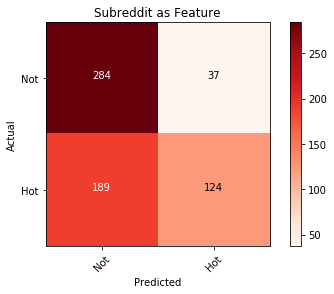

In [652]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes =['Not', 'Hot'], title = 'Subreddit as Feature')

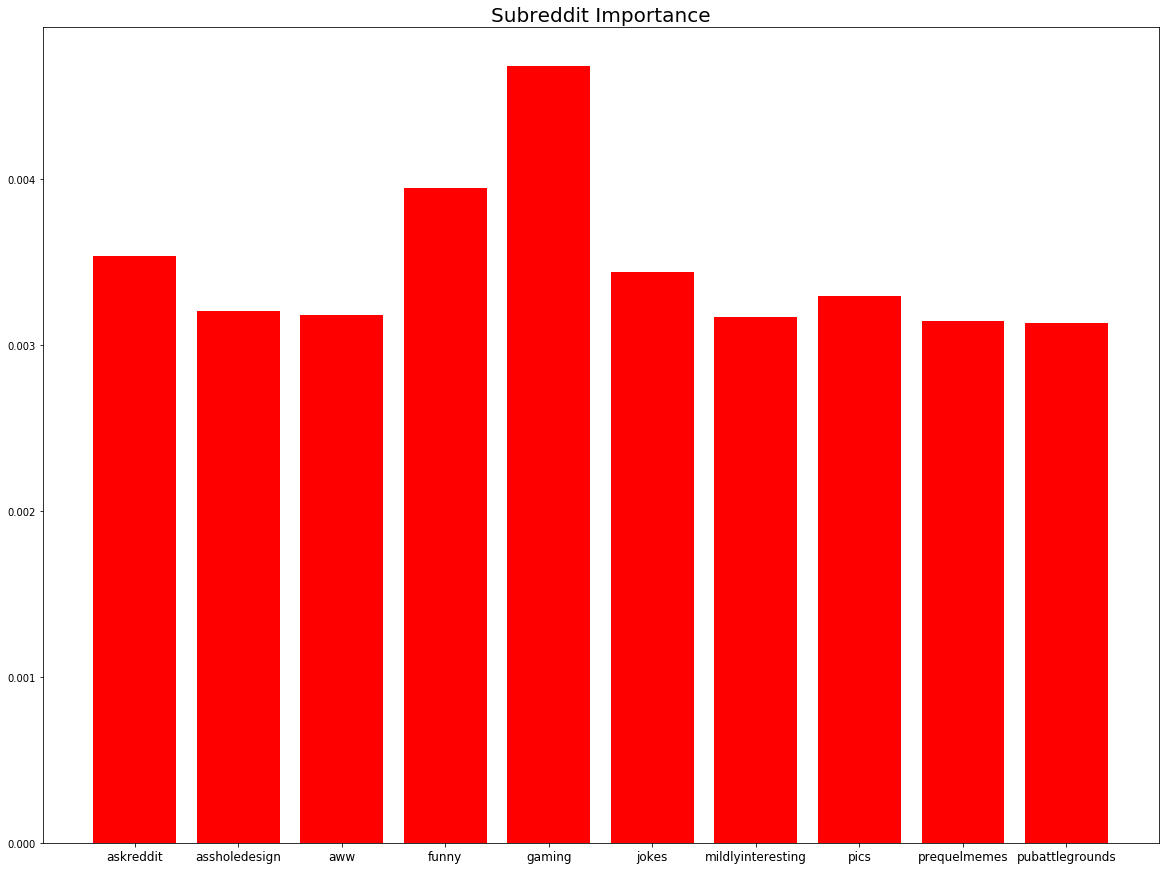

In [657]:
# Source: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
f= pipe.steps[1][1].feature_importances_
g = pipe.steps[0][1].get_feature_names()
s =sorted(list(zip(f, g)),reverse=True)[:10]
plt.figure(figsize=(20, 15))
plt.title('Subreddit Importance', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='r')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

# Second Model - Fun Features
This model uses a number of features that were engineered. The is_video feature, tells if the posts are a video or not. Utitlizing the '.astype(int) makes the trues and falses of is_video into a dummy column giving 1 for true and 0 for false. Investigating punctuation I looked into if posts' titles were questions, exclamations or if people appreciated good grammer and if the post ended with a period. The last two features are if cats were in the title and if the word when is in the title. Since all the variables have been dummied using '.astype(int)' this model just used randomforest. Without optimization the model returned an accuracy score of 55.99%, better than baseline, With GridsearchCV optimization the model returned an accuracy of 53.05%, a little worse but better than the baseline. A confusion matrix was used as a metric for this model as well as feature importance to see which of these fun features contributed to predicted 'Hot or Not'. 

In [658]:
## YOUR CODE HERE
df['vidint'] = df['is_video'].astype(int)
df['question'] = df['title'].str.endswith('?').astype(int)

df['exclamation'] = df['title'].str.endswith('!').astype(int)
df['period'] = df['title'].str.endswith('.').astype(int)
df['cats'] = df['title'].str.contains(r'cat|cats|Cat|Cats').astype(int)
df['when'] = df['title'].str.contains(r'when|When').astype(int)
df.head()

,is_video,num_comments,num_crossposts,subreddit,time_elasped,title,vidint,question,exclamation,period,cats,when
0,False,191,1,aww,3.965600,A bit overprotective,0,0,0,0,0,0
1,False,275,0,pics,3.385044,Let us never forget.,0,0,0,1,0,0
2,False,1027,1,FortNiteBR,3.431155,New updates/ rideable shopping carts,0,0,0,0,0,0
3,False,650,1,funny,5.663377,Dave Bautista has achieved full Drax.,0,0,0,1,0,0
4,False,66,1,AnimalsBeingBros,4.229211,"Hey Human, Want a Treat?",0,1,0,0,0,0


In [709]:
#feature selction and train test split
X = df[['vidint', 'question', 'exclamation', 'period', 'cats', 'when']]
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,random_state= 55)
X_train.shape
y_train.shape
X_test.shape
y_test.shape



(634,)

In [710]:
#2nd model fun features
pipe_2 = Pipeline([
    ('RF', RandomForestClassifier(random_state=30))
])
pipe_2.fit(X_train,y_train)
pipe_2.score(X_test, y_test)

0.5599369085173501

In [711]:
params = {
    'RF__n_estimators':np.arange(1,10,1),
    'RF__min_samples_split': np.arange(2,11,1),
    'RF__max_features':[None,"sqrt", "log2"]
}

In [712]:
gs_2 = GridSearchCV(pipe_2, param_grid=params, cv=3)
gs_2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=30, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'RF__n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'RF__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'RF__max_features': [None, 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [713]:
print(gs_2.best_score_)
print(gs_2.best_params_)

0.5304942166140905
{'RF__max_features': 'sqrt', 'RF__min_samples_split': 2, 'RF__n_estimators': 4}


In [714]:
y_pred = gs_2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [715]:
print('tn', tn,
     'fp', fp,
     'fn', fn,
     'tp', tp)

tn 253 fp 68 fn 212 tp 101


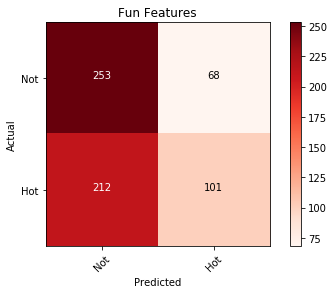

In [716]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes =['Not', 'Hot'], title = 'Fun Features')

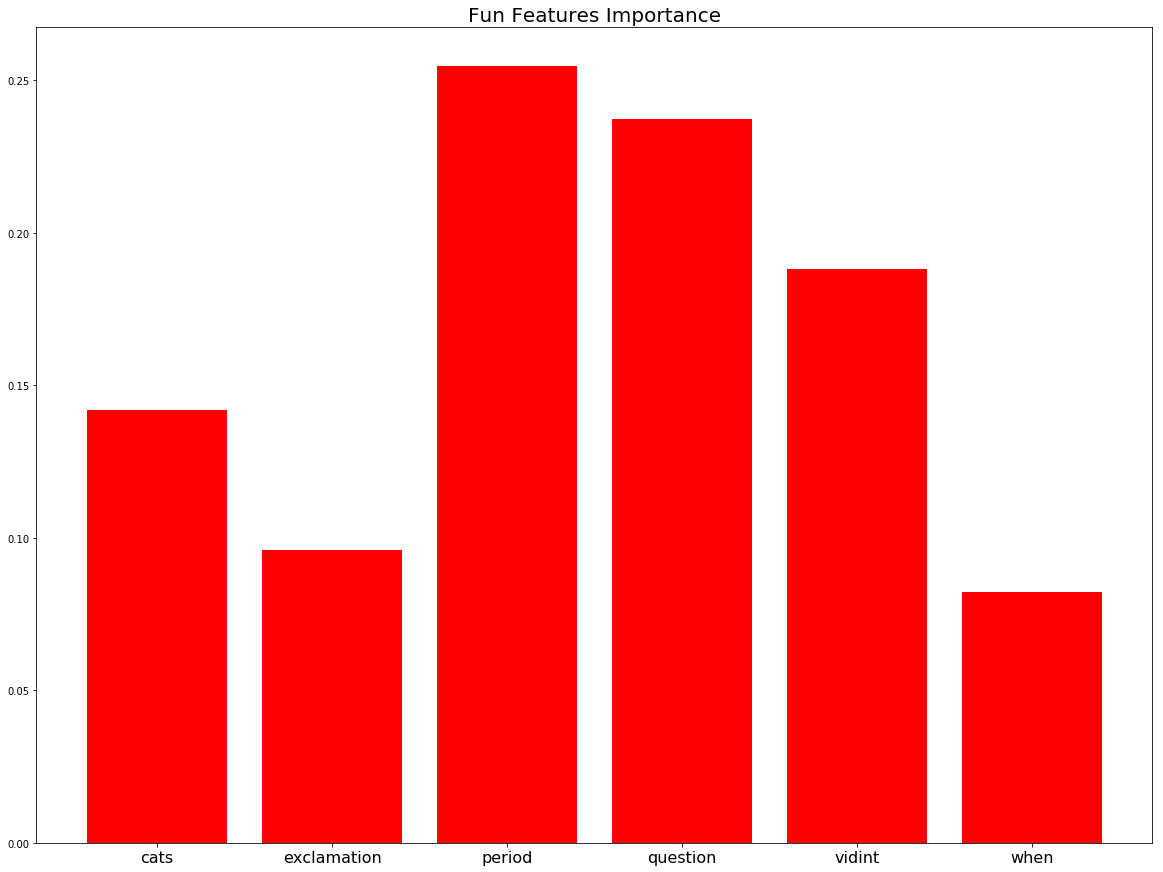

In [717]:
f = pipe_2.steps[0][1].feature_importances_
s =sorted(list(zip(f, X_train.columns)),reverse=True)[:6]
plt.figure(figsize=(20, 15))
plt.title('Fun Features Importance', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='r')
plt.xticks(fontsize=16)
plt.tight_layout
plt.show()

# Model 3 - Many features RandomForest
This model utilzes the fun features form model 2, the subbreddits from model 1, time_elasped, number of crossposts, and the words in the title of the reddit posts. To use the subreddit and the titles I needed to countvectorize each feature. Since titles contain multiple words I used a stop_word='eglish in the countvectorizer. This would filter out words that do not transmit much information in the english language, like 'the', 'a' , and 'an' for example. Countvectorizer returns matrices for your titles and subreddits so I unpacked them into arrays and made them into pandas dataframes. Once they are dataframes I concatenated them to the orginal features I wanted and this dataframe became my features for this model. Having numerical data like number of crossposts and time elasped I used the transformer standarscaler to scale all the features as a precaution. I ran a randomforest model which when not optimized produced an accuracy of 67.03% and when optimized using GridsearchCV produced an accuracy of 68.82%. A confusion matrix was used as a metric to test the model's performance and feature importance was used to see what features contributed to predicted a 'Hot' post.

In [668]:
X =df[['title','subreddit','time_elasped','num_crossposts','vidint', 'question', 'exclamation', 'period', 'cats', 'when']]

In [669]:
#transform titles
cvec = CountVectorizer(stop_words='english')
X_title = cvec.fit_transform(df['title'])
cvec.get_feature_names()
X_title.toarray()
words_in_title= pd.DataFrame(X_title.toarray(), columns=cvec.get_feature_names(), index = X.index)

In [670]:
words_in_title.shape

(2536, 6737)

In [671]:
# transoform subreddit
cvec = CountVectorizer()
X_subreddit = cvec.fit_transform(df['subreddit'])
cvec.get_feature_names()
X_subreddit.toarray()
subred= pd.DataFrame(X_subreddit.toarray(), columns=cvec.get_feature_names(), index = X.index)

In [672]:
subred.shape

(2536, 1814)

In [673]:
X =df[['time_elasped','num_crossposts','vidint', 'question', 'exclamation', 'period', 'cats', 'when']]

In [674]:
#concat wanted features together
X = pd.concat([words_in_title, subred, X], axis=1)

In [675]:
X.head()

,00,000,008004,02,03,04,05,050,07,0m,...,zerowaste,zoomies,time_elasped,num_crossposts,vidint,question,exclamation,period,cats,when
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3.965600,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,3.385044,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,3.431155,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,5.663377,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,4.229211,1,0,1,0,0,0,0


In [676]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =121)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(634,)

In [677]:
# model 3 many feats
pipe_3 = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=8))
])

In [678]:
pipe_3.fit(X_train, y_train)
pipe_3.score(X_test, y_test)

0.6703470031545742

In [679]:
params = {
    'rf__n_estimators':np.arange(1,10,1),
    'rf__min_samples_split': np.arange(2,11,1),
    'rf__max_features':[None,"sqrt", "log2"]
}

In [680]:
gs_3 = GridSearchCV(pipe_3, param_grid=params, cv=3)
gs_3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0...stimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf__n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'rf__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'rf__max_features': [None, 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [681]:
print(gs_3.best_score_)
print(gs_3.best_params_)


0.6882229232386962
{'rf__max_features': 'sqrt', 'rf__min_samples_split': 6, 'rf__n_estimators': 9}


In [682]:
y_pred = gs_3.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [683]:
print('tn', tn,
     'fp', fp,
     'fn', fn,
     'tp', tp)

tn 229 fp 92 fn 117 tp 196


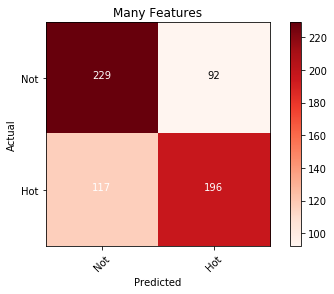

In [684]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes =['Not', 'Hot'], title = 'Many Features')

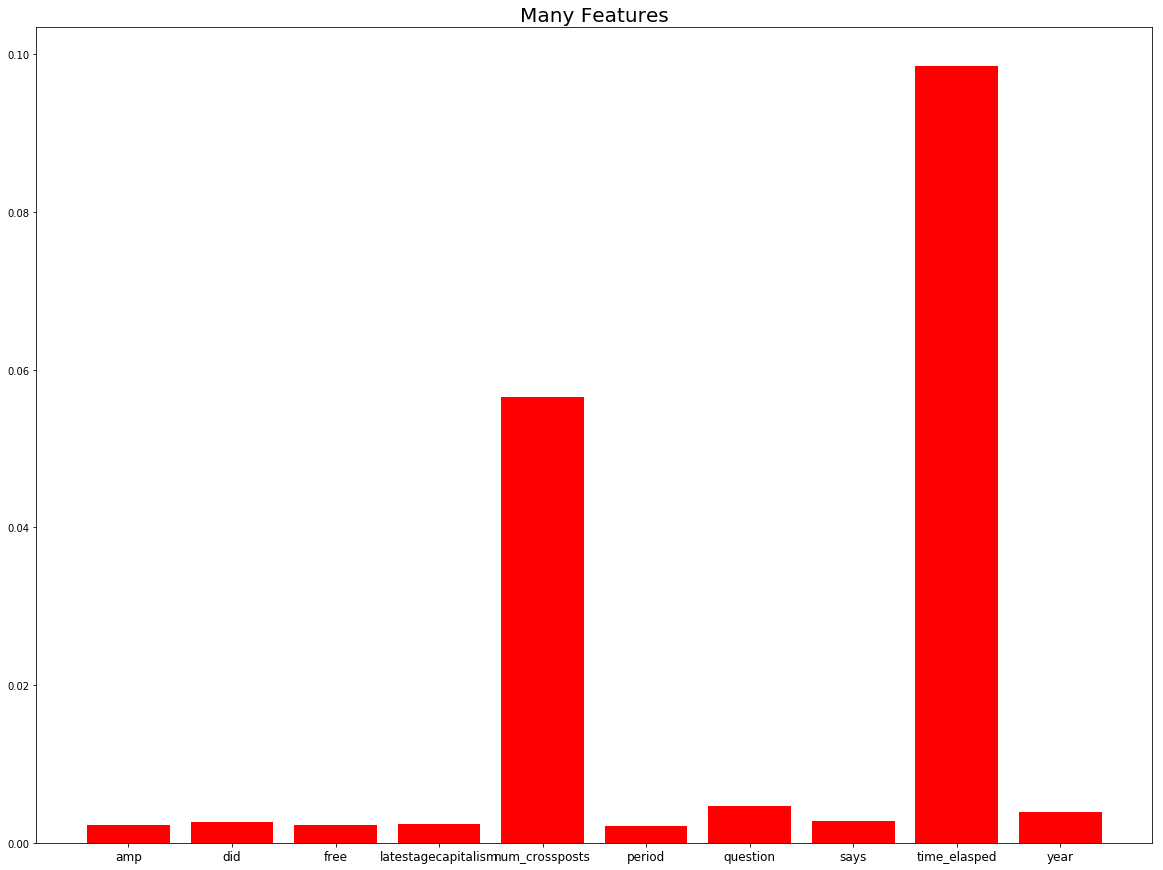

In [685]:
f = pipe_3.steps[1][1].feature_importances_
s = sorted(list(zip(f, X_train.columns)),reverse=True)[:10]
plt.figure(figsize=(20, 15))
plt.title('Many Features', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='r')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [686]:
## YOUR CODE HERE
cross_val_score(pipe_3, X_test, y_test, scoring='accuracy')


array([0.67924528, 0.65402844, 0.65402844])

#### Repeat the model-building process with a non-tree-based method.

# Model 4 - Many features Logistic Regression
To examine another model besides randomforest I choose logistic regrssion for this classification problem. Utiling the same features as in model 3 I transformed the features using a standardscalar.Running the the model without optimization the accuracy score was 62.15%. Optimizing with GridsearchCV I got an accuracy score of 69.24%. GridsearchCV optimized the logistic regression to have a penalty of l1 the LASSO penalty and a low C of 0.1. I used a confusion matrix to further investigate the modles performance. I used a logistic regression coefs_ to see which features best predicted a 'Hot' post.

In [687]:
## YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
#model 4 many feats with log reg
pipe_4 = Pipeline([
    ('ss', StandardScaler()),
    ('logreg', LogisticRegression(random_state=111))
])


In [688]:
pipe_4.fit(X_train, y_train)
pipe_4.score(X_test, y_test)

0.6214511041009464

In [689]:
params = {
    'logreg__penalty':['l1', 'l2'],
    'logreg__C': np.arange(0.1,1, 0.1)
    
}

In [690]:
gs_4 = GridSearchCV(pipe_4, param_grid=params, cv=3)
gs_4.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=111, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logreg__penalty': ['l1', 'l2'], 'logreg__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [691]:
print(gs_4.best_score_)
print(gs_4.best_params_)


0.692429022082019
{'logreg__C': 0.1, 'logreg__penalty': 'l1'}


In [692]:
y_pred = gs_4.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [693]:
print('tn', tn,
     'fp', fp,
     'fn', fn,
     'tp', tp)

tn 263 fp 58 fn 136 tp 177


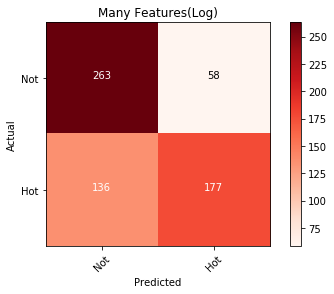

In [694]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes =['Not', 'Hot'], title = 'Many Features(Log)')

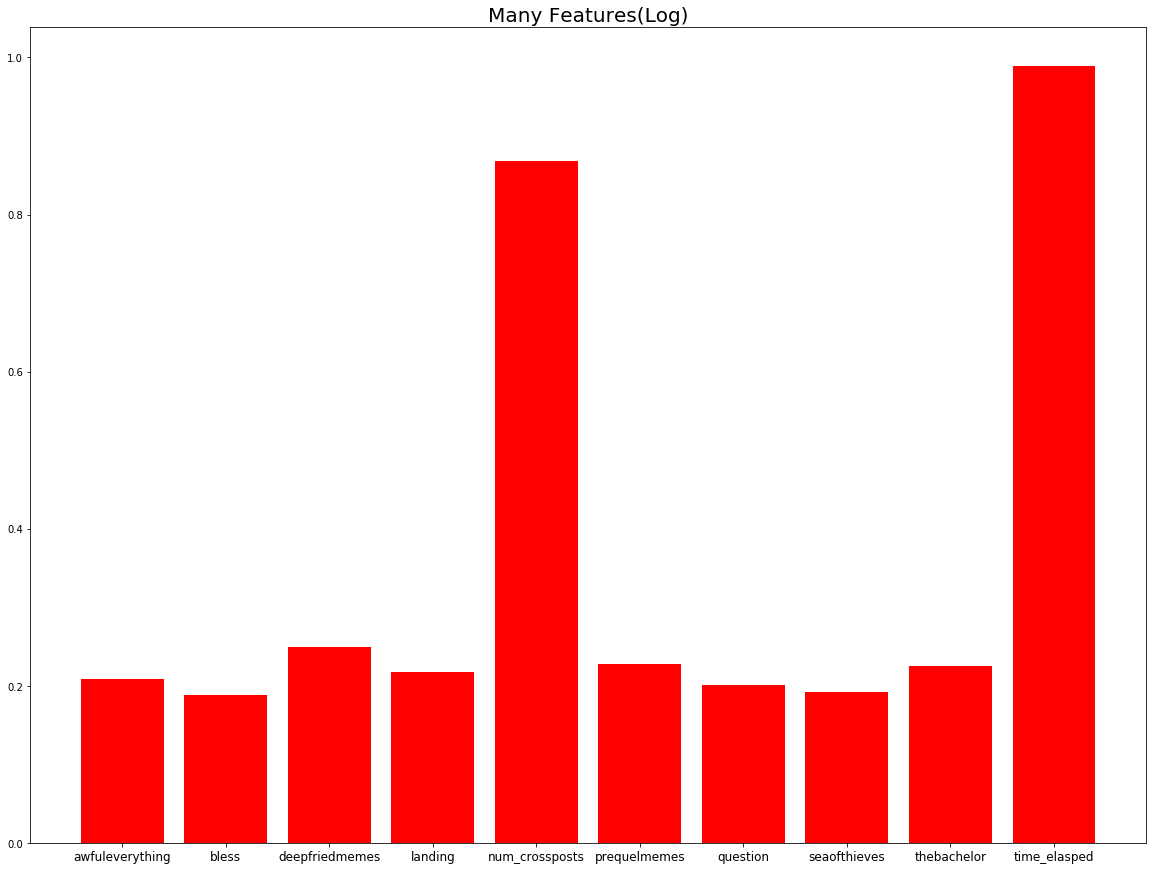

In [695]:
c = pipe_4.steps[1][1].coef_
s = sorted(list(zip(c.T[:], X_train)),reverse=True)[:10]
plt.figure(figsize=(20, 15))
plt.title('Many Features(Log)', fontsize=20)
sy = [y[0][0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='r')
plt.xticks(fontsize=12)
plt.tight_layout
plt.show()


#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

# Model 5 Title as only Feature
This model is alot like the first model with subreddit being the only feature, but now the words in titles are the only features. One big difference is the stop_words ='english in the CountVectorizer. This will filter out words that do not transmit vital information, such as words like,'for', 'or' and 'they' as examples. When running an model without optmization, the model returns an accuracy score of 49.84% the worst scoring model and the only model to score worse than the baseline. When running gridsearch to optimize the model the model returns a score of 55.84%. The Gridsearch CV optimized the title feature utilizing the countvectorizer's binary set to equal False, which means each word gets a count everytime that word shows up in a post's title. 

In [47]:
## YOUR CODE HERE
X = df['title']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=22)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(634,)

In [48]:
#model 5 just with title
pipe_5 = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('rf', RandomForestClassifier(random_state=121))
])

In [49]:
pipe_5.fit(X_train, y_train)
pipe_5.score(X_test, y_test)

0.5283911671924291

In [50]:
params = {
    'cvec__binary':[False, True],
    'cvec__ngram_range':[(1,1), (1,2), (1,3)]
}

In [51]:
gs_5 =GridSearchCV(pipe_5, param_grid=params, cv=3)

In [52]:
gs_5.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...timators=10, n_jobs=1,
            oob_score=False, random_state=121, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'cvec__binary': [False, True], 'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
print(gs_5.best_score_)
print(gs_5.best_params_)

0.544689800210305
{'cvec__binary': True, 'cvec__ngram_range': (1, 1)}


In [54]:
y_pred = gs_5.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [55]:
print('tn', tn,
     'fp', fp,
     'fn', fn,
     'tp', tp)

tn 236 fp 85 fn 207 tp 106


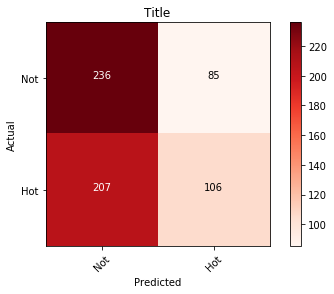

In [56]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes =['Not', 'Hot'], title = 'Title')

In [57]:
f= pipe_5.steps[1][1].feature_importances_
g = pipe_5.steps[0][1].get_feature_names()
s =sorted(list(zip(f, g)),reverse=True)[:10]


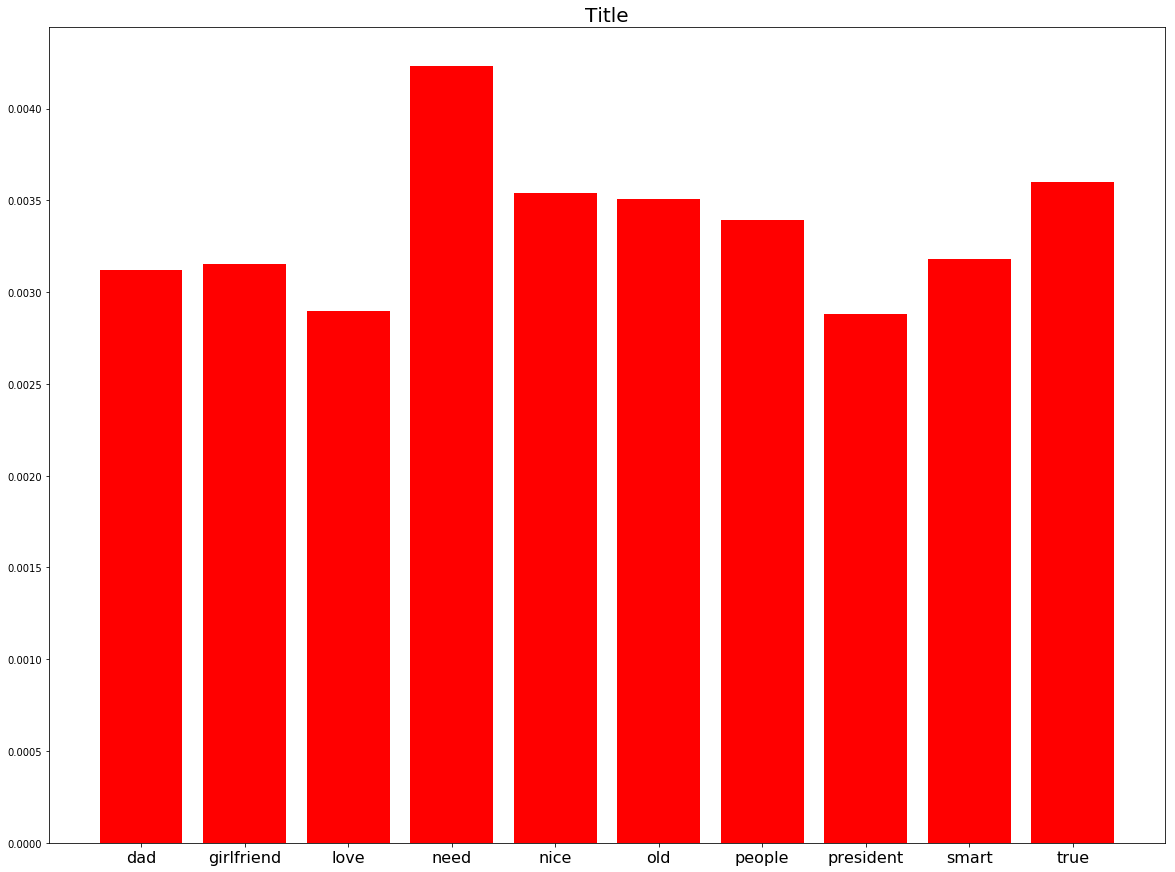

In [707]:
plt.figure(figsize=(20, 15))
plt.title('Title', fontsize=20)
sy = [y[0] for y in s]
sx = [x[1] for x in s]
plt.bar(sx, sy, color ='r')
plt.xticks(fontsize=16)
plt.tight_layout
plt.show()

In [734]:
df[df['num_comments'] > df['num_comments'].median()]['time_elasped'].mean()
# avg number of hours for a hot post

9.956260710650474

In [14]:
df[df['num_comments'] > df['num_comments'].median()]['num_crossposts'].mean()
#avg number of crossposts for hot post

0.6280925778132482

In [18]:
df.num_comments.median()

21.0